In [7]:
import yfinance as yf

# GameStop 주식 데이터 추출
gme_stock = yf.Ticker("GME")
gme_data = gme_stock.history(period="max")

# 인덱스를 재설정하고 데이터프레임을 저장
gme_data_reset = gme_data.reset_index()

# 재설정된 데이터프레임의 처음 5개 행을 표시
print(gme_data_reset.head())


                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620129  1.693350  1.603296  1.691667  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658002  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666417  1.666417  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [6]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Tesla 매출 데이터 웹 스크래핑
url = 'https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# 수익 데이터 추출
tesla_revenue = []
for row in soup.find_all('tr'):
    cols = row.find_all('td')
    if len(cols) == 2:
        date = cols[0].text.strip()
        revenue = cols[1].text.strip().replace('$', '').replace(',', '')
        tesla_revenue.append([date, revenue])

# tesla_revenue 리스트를 데이터프레임으로 변환
tesla_revenue_df = pd.DataFrame(tesla_revenue, columns=["Date", "Revenue"])

# 데이터프레임의 마지막 5개 행을 표시
print(tesla_revenue_df.tail())


Empty DataFrame
Columns: [Date, Revenue]
Index: []


In [4]:
import yfinance as yf

# Tesla 주식 데이터 추출
tesla_stock = yf.Ticker("TSLA")
tesla_data = tesla_stock.history(period="max")

# Tesla 주식 데이터 인덱스 재설정
tesla_data_reset = tesla_data.reset_index()

# 재설정된 데이터프레임의 처음 5개 행을 표시
print(tesla_data_reset.head())


                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


In [12]:
import yfinance as yf
import plotly.graph_objs as go
import plotly.io as pio

# 렌더러를 브라우저로 설정
pio.renderers.default = 'browser'

# GameStop 주가 데이터를 그래프로 표시
make_graph(gme_data, "GameStop Stock Price Over Time")


# GameStop 주식 데이터 추출
gme_stock = yf.Ticker("GME")
gme_data = gme_stock.history(period="max")

# 그래프를 그리는 함수 정의
def make_graph(data, title):
    fig = go.Figure(data=[go.Scatter(x=data.index, y=data['Close'], mode='lines', name='Close Price')])
    fig.update_layout(title=title, xaxis_title='Date', yaxis_title='Price (USD)')
    fig.show()

# GameStop 주가 데이터를 그래프로 표시
make_graph(gme_data, "GameStop Stock Price Over Time")


In [8]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# GameStop 매출 데이터 웹 스크래핑
url = 'https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# 수익 데이터 추출
gme_revenue = []
for row in soup.find_all('tr'):
    cols = row.find_all('td')
    if len(cols) == 2:
        date = cols[0].text.strip()
        revenue = cols[1].text.strip().replace('$', '').replace(',', '')
        gme_revenue.append([date, revenue])

# gme_revenue 리스트를 데이터프레임으로 변환
gme_revenue_df = pd.DataFrame(gme_revenue, columns=["Date", "Revenue"])

# 데이터프레임의 마지막 5개 행을 표시
print(gme_revenue_df.tail())


Empty DataFrame
Columns: [Date, Revenue]
Index: []


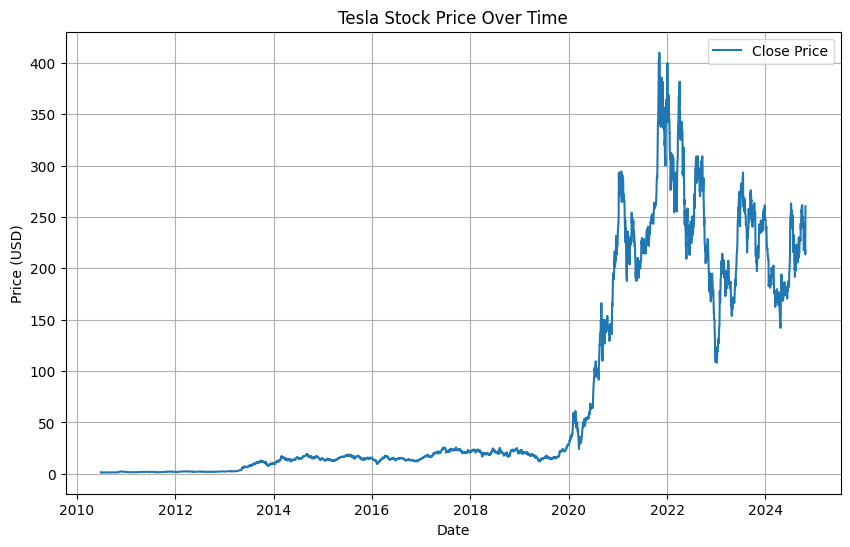

In [9]:
import yfinance as yf
import matplotlib.pyplot as plt

# Tesla 주식 데이터 추출
tesla_stock = yf.Ticker("TSLA")
tesla_data = tesla_stock.history(period="max")

# 그래프를 그리는 함수 정의
def make_graph(data, title):
    plt.figure(figsize=(10,6))
    plt.plot(data.index, data['Close'], label='Close Price')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Tesla 주가 데이터를 그래프로 표시
make_graph(tesla_data, "Tesla Stock Price Over Time")
